<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_4/dstep23_minneapolis_police_stops_rvichot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Open Minneapolis: Police Stops**

*September 21, 2023*

This notebook will explore the following Problem Statement question: *In 2017, did police stops in Minneapolis that involve a person of color also involve a personal search more frequently than did stops involving white persons?*  The data can be found [here](http://opendata.minneapolismn.gov/datasets/police-stop-data).

---

### **Loading the data**

As always, our first step is to load the data, and take a quick look at its contents.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# -- set the file name
fname = "/content/drive/Shareddrives/dstep23/data/minneapolis_pd/Police_Stop_Data.csv"

# -- load the data
stops = pd.read_csv(fname)

<ipython-input-5-9b1cec5c3585>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  stops = pd.read_csv(fname)


Interesting warning... let's try to follow its recommendations:

In [6]:
# -- re-load the data
stops = pd.read_csv(fname, low_memory=False)

In [7]:
# -- display the dataframe
stops

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
0,1,16-395258,2016/10/31 22:40:47+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00
1,2,16-395296,2016/10/31 23:06:36+00,NaN,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00
2,3,16-395326,2016/10/31 23:20:54+00,NaN,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00
3,4,16-395328,2016/10/31 23:23:20+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00
4,5,16-395333,2016/10/31 23:26:05+00,NaN,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182648,182649,21-216322,2021/09/21 00:58:49+00,Equipment Violation,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Unknown,Male,44.984920,-93.246890,-1.038020e+07,5.619147e+06,2.0,Marcy Holmes,2021/09/21 08:20:31+00
182649,182650,21-216339,2021/09/21 02:07:04+00,Citizen / 9-1-1,Suspicious Person (P),GOA-Gone on Arrival,NO,NO,NO,White,Unknown,Male,44.966928,-93.283228,-1.038424e+07,5.616317e+06,1.0,Loring Park,2021/09/21 08:20:28+00
182650,182651,21-216341,2021/09/21 02:11:46+00,Equipment Violation,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Unknown,Female,45.002320,-93.246705,-1.038018e+07,5.621887e+06,2.0,Northeast Park,2021/09/21 08:20:32+00
182651,182652,21-216344,2021/09/21 02:48:13+00,Investigative,Suspicious Vehicle (P),RPT-Report,NO,NO,YES,Unknown,Unknown,Unknown,44.960900,-93.270210,-1.038279e+07,5.615368e+06,5.0,Whittier,2021/09/21 08:20:31+00


---

### **Data Wrangling Part 1: from slicing to indexing**

What if we wanted stops for the year 2017?  How would we "sub-select" only those rows?  Well, first let's figure out what data type is in the `"responseDate"` column,

In [8]:
# -- display column data types
stops.dtypes

OBJECTID                  int64
masterIncidentNumber     object
responseDate             object
reason                   object
problem                  object
callDisposition          object
citationIssued           object
personSearch             object
vehicleSearch            object
preRace                  object
race                     object
gender                   object
lat                     float64
long                    float64
x                       float64
y                       float64
policePrecinct          float64
neighborhood             object
lastUpdateDate           object
dtype: object

In [10]:
# -- check data dtype of first element of response date column
type(stops["responseDate"].iloc[0])

str

Looks like it's a string.  So let's start with a string method like we saw last time.  This time let's use the `.contains()` string method,


In [11]:
# -- display the result of using the .contains() method to see what rows of
#    response date include contain the string "2017"
ind2017 = stops["responseDate"].str.contains("2017")

In [14]:
ind2017.unique()

array([False,  True])

The first five and last five rows are all `False` (note the dtype...), but are there any `True` in there?  To find out, first note the following:

In [15]:
# -- example boolean NumPy array
barr = np.array([True, True, False, True, False, False, True])

# -- summing it treats the True's as 1's and the False's as 0's
print(barr.sum())

4


So, how would we find out if the output of `.contains("2017")` is `True` somewhere inside those ...'s ?

In [16]:
# -- check if any response dates contain the string "2017"
n2017 = ind2017.sum()

print("total number of response dates in 2017: {0}".format(n2017))

total number of response dates in 2017: 54156


Already now, we can answer a potentially interesting policy question, ***how many stops per year from 2017 to 2020***?

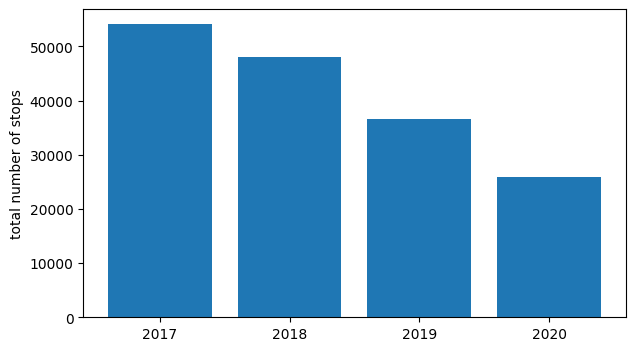

In [17]:
# -- create a new DataFrame containing the number of stops in 2017,
#    2018, 2019, and 2020, and make a bar plot

# -- calculate number of stops for each year
n2017 = stops["responseDate"].str.contains("2017").sum()
n2018 = stops["responseDate"].str.contains("2018").sum()
n2019 = stops["responseDate"].str.contains("2019").sum()
n2020 = stops["responseDate"].str.contains("2020").sum()

# -- make a bar plot
years = [2017, 2018, 2019, 2020]
nstops = [n2017, n2018, n2019, n2020]

# -- make a bar plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(years, nstops)
ax.set_xticks(years)
ax.set_ylabel("total number of stops")
fig.show()

*How would you interpret this plot?*

Now, we need to finish sub-selecting only 2017 stops for further analysis.  But first...

**A Brief Aside on Boolean "Indexing"...**

Notice the following:

In [18]:
# -- create a number array with some values that is the SAME LENGTH as the
#    boolean array (barr) created above
myarr = np.array([62.3, -23, 63, 94, 1, -22.5, 0.88])
barr = np.array([True, True, False, True, False, False, True])

# -- print ONLY values where barr is True
print(myarr)
print(barr)
print(myarr[barr])

[ 62.3  -23.    63.    94.     1.   -22.5    0.88]
[ True  True False  True False False  True]
[ 62.3  -23.    94.     0.88]


This is type of operation is called "indexing" and is an extension of the "slicing" concept we've seen before:

In [ ]:
# -- slicing
print(myarr[2:5])

# -- indexing
ind = np
print(myarr[ind])

There is one last bit of indexing that we'll need to subset this data into a form that we want: "relational indexing".  We've actually seen already in a slightly different format.

In [19]:
# -- create a number array with some values
myarr = np.array([62.3, -23, 63, 94, 1, -22.5, 0.88])

# -- print ONLY values that are negative
ind = np.array([False, False, True, True, True, False, False])
print(myarr[ind])

[63. 94.  1.]


In [22]:
myarr

array([ 62.3 , -23.  ,  63.  ,  94.  ,   1.  , -22.5 ,   0.88])

In [20]:
# -- create a number array with some values
myarr = np.array([62.3, -23, 63, 94, 1, -22.5, 0.88])

# -- print ONLY values that are negative
ind = myarr < 0
print(myarr[ind])

[-23.  -22.5]


In [21]:
# -- here are some examples of these types of logical relations
print("1. {0}".format(myarr >= 1))
print("2. {0}".format(myarr == 0.88))
print("3. {0}".format(myarr != 63))

1. [ True False  True  True  True False False]
2. [False False False False False False  True]
3. [ True  True False  True  True  True  True]


**...back to our Minneapolis police stops DataFrame.**

Notice that the output of our `.str.contains("2017")` method call was exactly a `True`/`False` (boolean) array!  So now we can finally subset our Minneapolis stops data to only 2017:

In [ ]:
# -- create a True/False index of when response date contains 2017
ind2017 = stops["responseDate"].str.contains("2017")

# -- sub-select only those rows
stops17 = stops[ind2017]

# -- display the result
stops17

With this, we have the tools to answer the question: **<i>"in 2017, what fraction of stops involved a person of color?"</i>**, right???

In [26]:
# -- display the unique values of race in this dataset
stops17["race"].unique()

array(['Unknown', 'White', 'East African', 'Black', 'Other', nan,
       'Latino', 'Asian', 'Native American'], dtype=object)

In [27]:
# -- create True/False arrays for White and not White
ind_wht = stops17["race"] == "White"
ind_poc = stops17["race"] != "White"

nstops17 = len(stops17)
nwht17 = ind_wht.sum()
npoc17 = ind_poc.sum()

print("fraction of subjects that are white     : {0:4.3}".format(nwht17 / nstops17))
print("fraction of subjects that are not white : {0:4.3}".format(npoc17 / nstops17))

fraction of subjects that are white     : 0.222
fraction of subjects that are not white : 0.778


**Not so fast...**, we still have to deal with NaN's, type of stop, *etc*.

---

### **Data Wrangling Part 2: removing NaNs and groupings**

What to do about NaNs is a complex consideration without a universal answer.  Different situations and different contexts require different handling of NaN values.

***Regardless of what you do with NaNs, the <u>most</u> important thing is to acknowledge your choice and describe its consequences when presenting results.***

For now, let's try dropping NaNs using the 2017 DataFrame's `.dropna()` method,

In [28]:
# -- drop NaNs
stops17.dropna()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
36568,36569,17-251489,2017/07/06 11:00:32+00,Citizen / 9-1-1,Suspicious Person (P),UTL-Unable to Locate,NO,NO,NO,Unknown,Unknown,Unknown,44.971280,-93.285779,-1.038453e+07,5.617001e+06,1.0,Loring Park,2017/08/08 10:24:25+00
36572,36573,17-251517,2017/07/06 11:19:35+00,Equipment Violation,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Black,Female,44.988260,-93.289389,-1.038493e+07,5.619673e+06,4.0,Near - North,2017/08/08 10:26:13+00
36584,36585,17-251588,2017/07/06 12:11:32+00,Investigative,Suspicious Person (P),ADV-Advised,NO,NO,NO,White,White,Male,44.948347,-93.278808,-1.038375e+07,5.613393e+06,5.0,Lyndale,2017/08/08 10:26:13+00
36592,36593,17-251645,2017/07/06 12:47:41+00,Investigative,Suspicious Vehicle (P),INF-Information,NO,NO,NO,Unknown,Unknown,Unknown,44.988492,-93.256732,-1.038129e+07,5.619710e+06,2.0,Nicollet Island - East Bank,2017/08/08 10:26:13+00
36594,36595,17-251668,2017/07/06 12:57:20+00,Moving Violation,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Black,Female,44.987595,-93.288739,-1.038485e+07,5.619569e+06,1.0,North Loop,2017/08/08 10:26:13+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95593,95594,17-469769,2017/12/12 06:31:50+00,Citizen / 9-1-1,Suspicious Person (P),FTC-Fail to Clear,NO,NO,NO,Unknown,Unknown,Unknown,45.012317,-93.304442,-1.038660e+07,5.623461e+06,4.0,Jordan,2018/10/02 13:45:16+00
95594,95595,17-472268,2017/12/14 07:42:24+00,Citizen / 9-1-1,Suspicious Person (P),UNF-Unfounded,NO,NO,NO,Unknown,Unknown,Unknown,44.924225,-93.256208,-1.038123e+07,5.609600e+06,3.0,Northrop,2018/10/02 13:45:16+00
95595,95596,17-473484,2017/12/15 06:49:27+00,Citizen / 9-1-1,Suspicious Person (P),GOA-Gone on Arrival,NO,NO,NO,Unknown,Unknown,Unknown,44.925070,-93.227040,-1.037799e+07,5.609733e+06,3.0,Ericsson,2018/10/02 13:45:38+00
95597,95598,17-487421,2017/12/28 07:57:56+00,Moving Violation,Traffic Law Enforcement (P),TAG-Tagged,YES,NO,NO,Unknown,Black,Female,44.993070,-93.304460,-1.038660e+07,5.620430e+06,4.0,Willard - Hay,2018/10/02 13:45:38+00


How many rows did we lose?

In [29]:
# -- check the fraction of rows were dropped
len(stops17.dropna())/len(stops17)

0.3632653814905089

That's a lot of lost data!  Perhaps we are being a bit restrictive.  For example, for the question we're trying to answer (BUT NOT OTHER QUESTIONS!), the `"preRace"` value may be fine taking on a NaN value.  Let's check which columns have the most NaN's using the `.isna()` method and summing:

In [31]:
# -- print out how many NaNs per column
stops17.isna().sum()

OBJECTID                    0
masterIncidentNumber        0
responseDate                0
reason                  19316
problem                     0
callDisposition          1163
citationIssued          34292
personSearch             8854
vehicleSearch            8854
preRace                  8854
race                     8854
gender                   8854
lat                         0
long                        0
x                           0
y                           0
policePrecinct            683
neighborhood              683
lastUpdateDate              0
dtype: int64

Since we're mostly interested in the `"race"` and `"personSearch"` columns, perhaps we can drop only rows that have NaNs in those columns:

In [32]:
# -- drop NaNs from race and personSearch columns and send to a new DataFrame
indr = ~stops17["race"].isna()  # race column is not NaN
indp = ~stops17["personSearch"].isna() # personSearch column is not NaN

ind_tot = indr & indp # combine indices (meaning both must be True)
sub17 = stops17[ind_tot]

In [34]:
# -- check the results to make sure it worked
sub17.isna().sum()
# -- check what fraction of rows are left
len(sub17) / len(stops17)

0.8365093433783883

And so we've only had to discard about 16.5% of our data for this question.  Now let's find the total number of stops for each race using the powerful `.groupby()` method,

In [41]:
# -- groupy by race and count stops
sub17.groupby("race").count()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
race,,,,,,,,,,,,,,,,,,
Asian,673,673,673,497,673,673,260,673,673,673,673,673,673,673,673,660,660,673
Black,15790,15790,15790,12095,15790,15790,6956,15790,15790,15790,15790,15790,15790,15790,15790,15634,15634,15790
East African,2225,2225,2225,1665,2225,2225,846,2225,2225,2225,2225,2225,2225,2225,2225,2205,2205,2225
Latino,1909,1909,1909,1455,1909,1909,748,1909,1909,1909,1909,1909,1909,1909,1909,1891,1891,1909
Native American,1604,1604,1604,1265,1604,1604,737,1604,1604,1604,1604,1604,1604,1604,1604,1583,1583,1604
Other,1422,1422,1422,1046,1422,1422,599,1422,1422,1422,1422,1422,1422,1422,1422,1397,1397,1422
Unknown,9645,9645,9645,7794,9645,9645,4860,9645,9645,9645,9645,9645,9645,9645,9645,9558,9558,9645
White,12034,12034,12034,9023,12034,12034,4858,12034,12034,12034,12034,12034,12034,12034,12034,11866,11866,12034


There is much to say about groupby objects:

- index is now the values
- need to have `.groupby()` followed by summary function (`.count()`, `.sum()`, `.first()`, `.mean()`, etc.)
- column names are unchanged but values are the result of the *summary function*
- can pop index back into output with `.reset_index()` method

We can use this grouped DataFrame to get the total number of stops for each race

In [42]:
# -- make counts by race DataFrame
cbr17 = sub17.groupby("race").count()

In [43]:
cbr17.index

Index(['Asian', 'Black', 'East African', 'Latino', 'Native American', 'Other',
       'Unknown', 'White'],
      dtype='object', name='race')

In [44]:
# -- get the index
rind = cbr17.index

print(rind)

Index(['Asian', 'Black', 'East African', 'Latino', 'Native American', 'Other',
       'Unknown', 'White'],
      dtype='object', name='race')


In [46]:
# -- get the total number of stopped white persons (nb, we know that OBJECTID
#    has no NaN values)
nstop_wht = cbr17["OBJECTID"].loc["White"]

In [48]:
# -- get the total non-white stopped persons (NOTE: IT'S IMPORTANT THAT WE HAVE
#    EXCLUDED THE "UNKNOWN" CATEGORY)
print(rind[:6])

cbr17["OBJECTID"].loc["White"].loc[rind[:6]].sum()

Index(['Asian', 'Black', 'East African', 'Latino', 'Native American', 'Other'], dtype='object', name='race')


IndexError: ignored

In [ ]:
# -- print out the results
print("total number of stops with white subject     : {0}".format(nstop_wht))
print("total number of stops with non-white subject : {0}".format(nstop_poc))

---

### **Data Wrangling Part 3: putting it all together**

We now have the total number of stops for white subjects and subjects of color.  What remains is to get the total number of searches for each group.  We can do this by combining these grouping and indexing operations.

First, we should ***always*** make sure we understand the possible values of categorical data,

In [ ]:
# -- check unique values


In [ ]:
# -- create a new data frame with only YES for personSearched or vehicleSearched
psrch =
vsrch =
searched17 =

In [ ]:
# -- we can group and count exactly as we did with the full DataFrame to count
#    the total number of searched persons by race.

# -- make searched counts by race DataFrame
sbr17 =

# -- get the total number of searched white persons (nb, we know that OBJECTID
#    has no NaN values)
nsearch_wht =

# -- get the total number of searched non-white persons (NOTE: IT'S IMPORTANT
#    THAT WE HAVE EXCLUDED THE "UNKNOWN" CATEGORY)
nsearch_poc =

**And so finally, we can divide to get the ratio:**

In [ ]:
print("fraction of stopped white persons that are searched    : {0:4.3}".format(nsearch_wht / nstop_wht))
print("fraction of stopped persons of color that are searched : {0:4.3}".format(nsearch_poc / nstop_poc))

*How do we interpret these results?  What caveats are there?*

**post script...**

FWIW, we can also divide one DataFrame by another (element-wise):